This is a dataset describing the change in healthcare construction spending in the US over the last three decades since 2002. 
Healthcare construction includes:
1. Cost of materials

2. Labor Costs

3. Contractor’s profit

4. Cost of architectural and engineering work

5. Miscellaneous overhead and office costs chargeable to the project on the owner’s books

6. Interest and taxes paid during construction 

#This is the URL for the healthcare expenditure dataset https://fred.stlouisfed.org/series/TLHLTHCONS
#This is the URL for the GDP dataset https://fred.stlouisfed.org/series/GDP

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [3]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [4]:
#https://docs.google.com/spreadsheets/d/1CoifyIZiDa6uU40aM8KxmefyRw6TR4VxYis5nOo1Tmw/edit?usp=sharing
healthcare_expenditure_URL = 'https://docs.google.com/spreadsheets/d/1CoifyIZiDa6uU40aM8KxmefyRw6TR4VxYis5nOo1Tmw/edit?usp=sharing'
healthcare_expenditure_sheets_id  = '1CoifyIZiDa6uU40aM8KxmefyRw6TR4VxYis5nOo1Tmw'
health_expend_xls = pd.ExcelFile(f"https://docs.google.com/spreadsheets/d/{healthcare_expenditure_sheets_id}/export?format=xlsx")
hdf = pd.read_excel(health_expend_xls,'TLHLTHCONS',header = 0)
hdf #Healthcare Spending (in millions) from 2002-Apr 2024



,DATE,Healthcare_Expenditure
0,2002-01-01,25746.0
1,2002-02-01,25438.0
2,2002-03-01,25639.0
3,2002-04-01,26117.0
4,2002-05-01,26459.0
...,...,...
263,2023-12-01,69310.0
264,2024-01-01,69830.0
265,2024-02-01,68311.0
266,2024-03-01,69936.0


In [5]:
#'https://docs.google.com/spreadsheets/d/1m4dWDTW5RjB_yqhGh6_6f-hccIyoDZMN1XCJ3o4GjK0/edit?usp=sharing'
GDP_sheets_id = '1m4dWDTW5RjB_yqhGh6_6f-hccIyoDZMN1XCJ3o4GjK0'
GDP_xls = pd.ExcelFile(f"https://docs.google.com/spreadsheets/d/{GDP_sheets_id}/export?format=xlsx") 
GDP_df = pd.read_excel(GDP_xls,'GDP.csv',header = 0)
GDP_df #US GDP from 2002-Apr 2024

,DATE,GDP
0,2002-01-01,10783.500
1,2002-04-01,10887.460
2,2002-07-01,10984.040
3,2002-10-01,11061.433
4,2003-01-01,11174.129
...,...,...
85,2023-04-01,27453.815
86,2023-07-01,27967.697
87,2023-10-01,28296.967
88,2024-01-01,28624.069


In [6]:
GDP_df['GDP'] = GDP_df['GDP']*1000000000
GDP_df 

,DATE,GDP
0,2002-01-01,1.078350e+13
1,2002-04-01,1.088746e+13
2,2002-07-01,1.098404e+13
3,2002-10-01,1.106143e+13
4,2003-01-01,1.117413e+13
...,...,...
85,2023-04-01,2.745382e+13
86,2023-07-01,2.796770e+13
87,2023-10-01,2.829697e+13
88,2024-01-01,2.862407e+13


In [7]:
hdf['HCON_Spending']= hdf['HCON_Spending']*1000000
hdf

,DATE,Healthcare_Expenditure
0,2002-01-01,2.574600e+10
1,2002-02-01,2.543800e+10
2,2002-03-01,2.563900e+10
3,2002-04-01,2.611700e+10
4,2002-05-01,2.645900e+10
...,...,...
263,2023-12-01,6.931000e+10
264,2024-01-01,6.983000e+10
265,2024-02-01,6.831100e+10
266,2024-03-01,6.993600e+10


In [8]:
hdf.describe()

,Healthcare_Expenditure
count,2.680000e+02
mean,4.284029e+10
std,9.041585e+09
min,2.543800e+10
25%,3.882650e+10
50%,4.168600e+10
75%,4.658475e+10
max,6.993600e+10


In [9]:
GDP_df.describe()

,GDP
count,9.000000e+01
mean,1.771790e+13
std,4.773252e+12
min,1.078350e+13
25%,1.440929e+13
50%,1.668844e+13
75%,2.074428e+13
max,2.901671e+13


In [10]:
hdf = hdf.loc[[i for i in range(0,len(hdf),3)]]
hdf = hdf.reset_index()

hdf
         
   
    


,index,DATE,Healthcare_Expenditure
0,0,2002-01-01,2.574600e+10
1,3,2002-04-01,2.611700e+10
2,6,2002-07-01,2.760200e+10
3,9,2002-10-01,2.839200e+10
4,12,2003-01-01,2.769000e+10
...,...,...,...
85,255,2023-04-01,6.563700e+10
86,258,2023-07-01,6.454200e+10
87,261,2023-10-01,6.603400e+10
88,264,2024-01-01,6.983000e+10


In [11]:
GDP_df['Percent GDP on HCON_Spending'] = hdf['HCON_Spending'].div(GDP_df['GDP'],axis=0)
GDP_df['Percent GDP on HCON_Spending'] = GDP_df['Percent GDP on HCON_Spending']*100
GDP_df

,DATE,GDP,Percent GDP on Healthcare
0,2002-01-01,1.078350e+13,0.238754
1,2002-04-01,1.088746e+13,0.239881
2,2002-07-01,1.098404e+13,0.251292
3,2002-10-01,1.106143e+13,0.256676
4,2003-01-01,1.117413e+13,0.247805
...,...,...,...
85,2023-04-01,2.745382e+13,0.239082
86,2023-07-01,2.796770e+13,0.230773
87,2023-10-01,2.829697e+13,0.233361
88,2024-01-01,2.862407e+13,0.243956


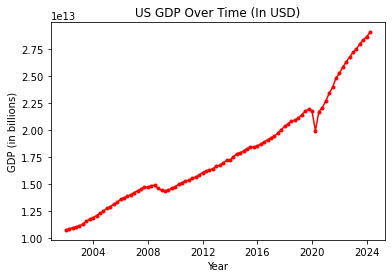

In [15]:
plt.plot(GDP_df.DATE,GDP_df.GDP,'r-',label = 'US GDP')
plt.title('US GDP Over Time (In USD)')
plt.xlabel('Year')
plt.ylabel('GDP (in billions)')
plt.show()

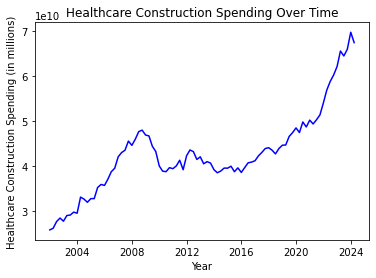

In [17]:
plt.plot(hdf.DATE,hdf.Healthcare_Expenditure,'b-',label = 'Healthcare Spending')
plt.title('Healthcare Construction Spending Over Time')
plt.xlabel('Year')
plt.ylabel('Healthcare Construction Spending (in millions)')
plt.show()

The data tells me that over the past two decades, the US has been consistent with the government budget dedicated to healthcare construction. Noticeable decreases in construction spending happen during an economic recession, the 2008 recession, but not the 2020 economic recession. This is likely because many healthcare facilities rely on government funding and investors and the recession constricted budgets. The 2020 economic recession was also special in that it was a recession tied to a pandemic where a surge of people got sick and so hospital staff were need more than ever. This is likely why in 2023-2024 the graph still shows an increased spike in construction spending to open more hospitals.

In conclusion, while healthcare remains heavily invested sector of the economy, the economic pressures of a recession generally lead to a reduction in investment in healthcare construction.